<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>


<h1 align=center><font size = 5>PRINCIPAL COMPONENT ANALYSIS IN R</font></h1>

---

## What is Principal Component Analysis?
Imagine you want to create a model to analyse and predict data. You have the structure for your model ready on your mind and are ready to create it. You get your dataset and upload it...

<center>
<img src=https://ibm.box.com/shared/static/buwt9pngja01j97gdcyu6gnzkz3rw9s4.jpg/>
<font size="2">*A dataset with a humongous amount of columns and rows.*</font>
</center>

...only to find that it is pretty big with many variables. With the increase in the number of dimensions, curse-of-dimensionality seeps in making it difficult for the estimation/optimization algorithm to converge. Many of these variables are highly correlated giving rise to collinearity issues in the simple regression based models vis-a-vis affecting model fit. 

Feature selection is process by which one can reduce the number of feature(s) either manually or automatically by eliminating or combining them, deleting some of the variables is the crudest form of reducing the dimensionality which almost alway leads to loss of information. It would be better if there was a way to condense the dimensions/features retaining optimal information.

Principal Component Analysis (PCA) is a **dimensionality reduction process** that can be applied to reduce the amount of features (or dimensions) from a data set while explaining maximum amount of variance in the data. PCA is based on **eigenvector(s) and eigenvalue(s)**, which, to keep it simple are mathematical constructs representing directional-component and magnitude of the variance of the transformed feature(s) respectively. For each dimension, there is one eigenvector and eigenvalue pair that describes that dimension. We want to find the **components that have the largest variance**, that is, the eigenvectors that have the largest eigenvalues associated to them. These eigenvectors are mutually orthogonal, otherwise known as non-correlated or independent.

Once we have the highest-variance components, we can represent our data using those instead of the original features and drop the ones with the lowest variances. This makes it so that we have few highly descriptive columns with the largest amounts of variance to differentiate our data points.

---

## Principal Component Analysis in R
Now that you know what Principal Component Analysis is and what are its uses, we can move on to actually using it in R. For this, we are going to utilize the `iris` dataset, so we do not need to load any datasets into R.

In R, there are a few different functions for analyzing Principal Components -- the preferred and most utilized one is `prcomp`.  `prcomp` takes the dataset you want to analyze as a parameter with two optional parameters (`center` and `scale.`), which do the work of centering (shifting your data points to be zero-centered) and scaling (so your observations have unit variance) your data, **which is recommended for PCA**.

Note that the `iris` dataset has a `Species` column, which is non-numerical. For PCA to work, we need to remove that column.

In [1]:
# NOTE: the "iris" data set is not appropriate for factor analysis (PDA)

# Retrieve the "iris" dataset, sans the "Species" column.
iris_numerical <- iris[,-5]

**Visualizing the Data**

In [2]:
install.packages("scatterplot3d") # Install
library("scatterplot3d") # load

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


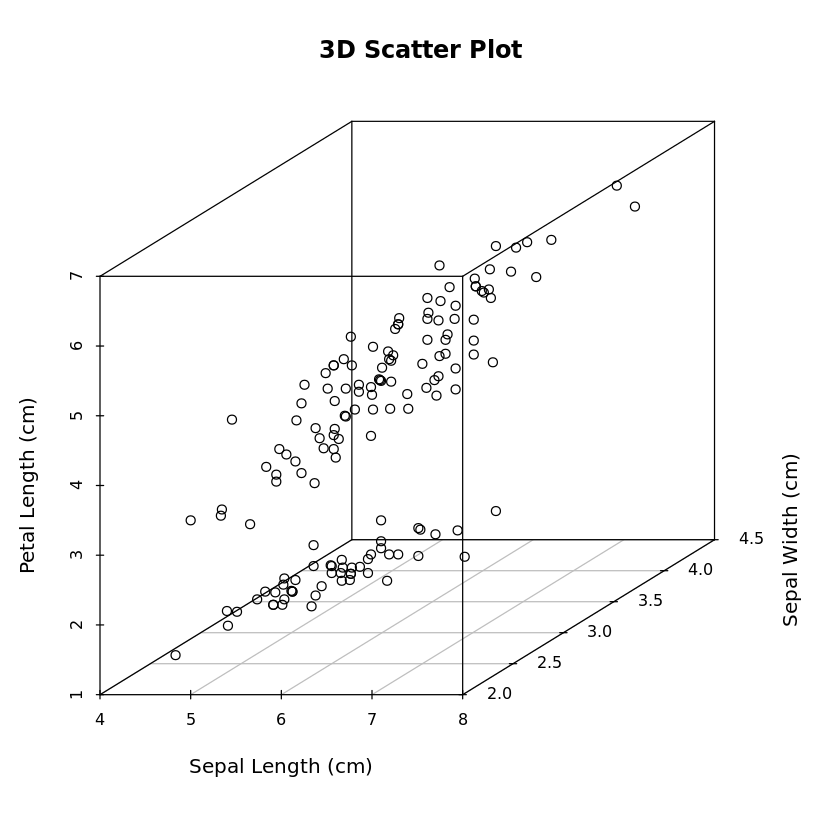

In [3]:
scatterplot3d(iris[,1:3],
              main="3D Scatter Plot",
              xlab = "Sepal Length (cm)",
              ylab = "Sepal Width (cm)",
              zlab = "Petal Length (cm)")

In [4]:
# Perform PCA on the numerical data from "iris"
# prcomp does all the work of centering and scaling our data for us!
pcaSolution <- prcomp(iris_numerical, center=TRUE, scale.=TRUE)

# Print a summary of the analysis
print(pcaSolution)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


Now, we have our analysis done -- with the standard deviation and rotation (the eigenvectors!) printed out. However, we can extract even more information from our analysis by using `summary`. For example:

In [5]:
# Print a summary of the results
summary(pcaSolution)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

As we can see, **the first two principal components are very descriptive of our data** -- together they amount for more than **95% of the variance present in our data** (look at the cumulative proportion row). This is a pretty good lead that we should use them as our dimensions.

However, there is another way of choosing what components are going to be used -- **Scree plots and the Kaiser-Guttman rule**. Scree plots are simple -- you just plot the eigenvalues for each component. It should be visible where there is a dropoff, which should be the cutoff for dimensions.

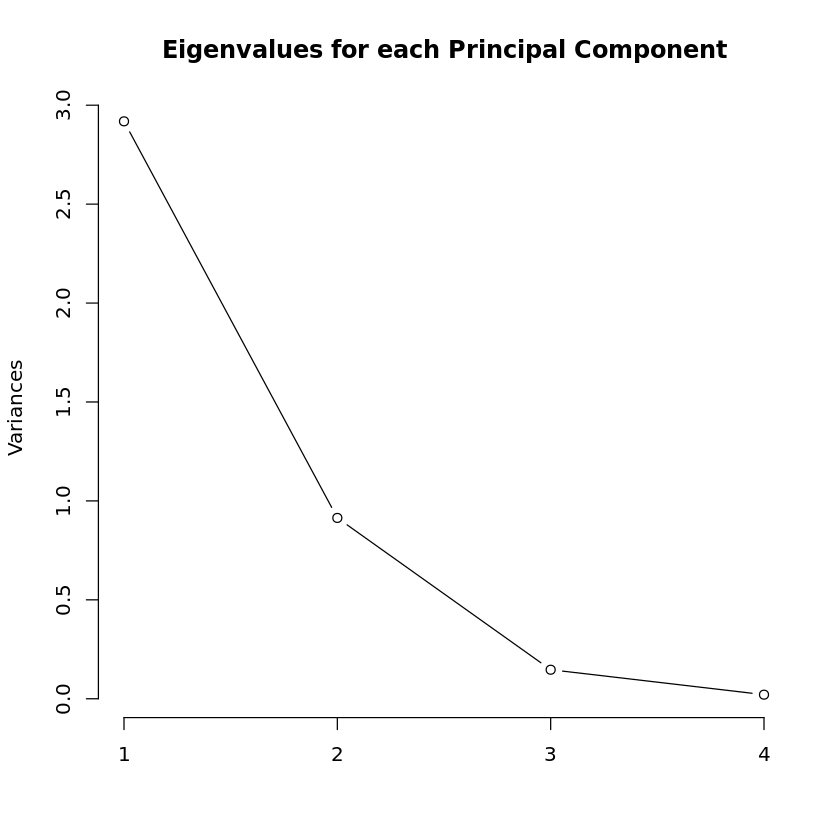

In [6]:
plot(pcaSolution, type="l", main="Eigenvalues for each Principal Component")

The Kaiser-Guttman rule states that one should pick the dimensions based on the average eigenvalue -- if a component presents a higher-than-average eigenvalue, then it should be picked. We can add this line to the Scree plot to visualize this cutoff better. Eigenvalues can be calculated as the square value of the standard deviation for a principal component, like this:

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Note: Considering that your data has been centered and scaled, the mean of the eigenvalues should be **equal to one**.
</div>

[1] 2.91849782 0.91403047 0.14675688 0.02071484

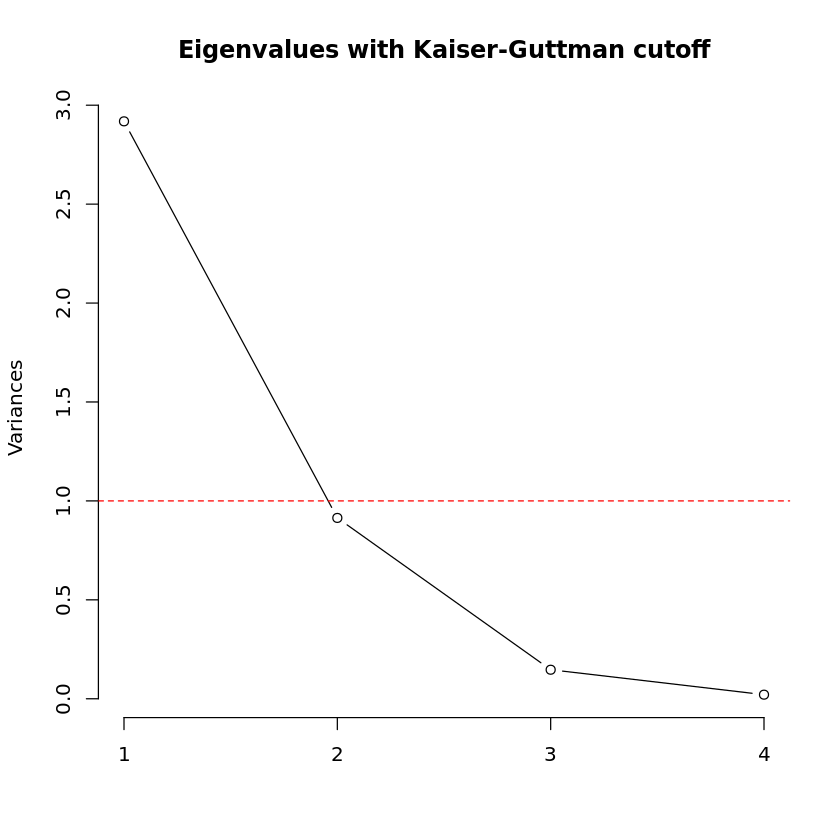

In [7]:
# Calculate and print the eigenvalues for the principal components.
# The eigenvalues are calculated by squaring the standard deviation values for each component.
eigenvalues <- (pcaSolution$sdev)**2
eigenvalues

{
# Plot the Scree plot.
screePlot <- plot(pcaSolution, type="l", main="Eigenvalues with Kaiser-Guttman cutoff")

# Add a cutoff line based on the mean of the eigenvalues.
# This should be equal to one for centered and scaled data.
abline(h=mean(eigenvalues),lty=2,col="red")
}

In this case it appears that picking the first component, and *possibly* the second component seems like the correct choice. To get the actual data with the rotation applied (aligned to the component axes), you should retrieve the `x` column from our solution:

In [8]:
# Retrieve the values of the observations for each principal component.
rotated_values <- pcaSolution$x

# Print out the first six rows of data.
head(rotated_values)

PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


**Visualizing the two components**

[1] 150   4

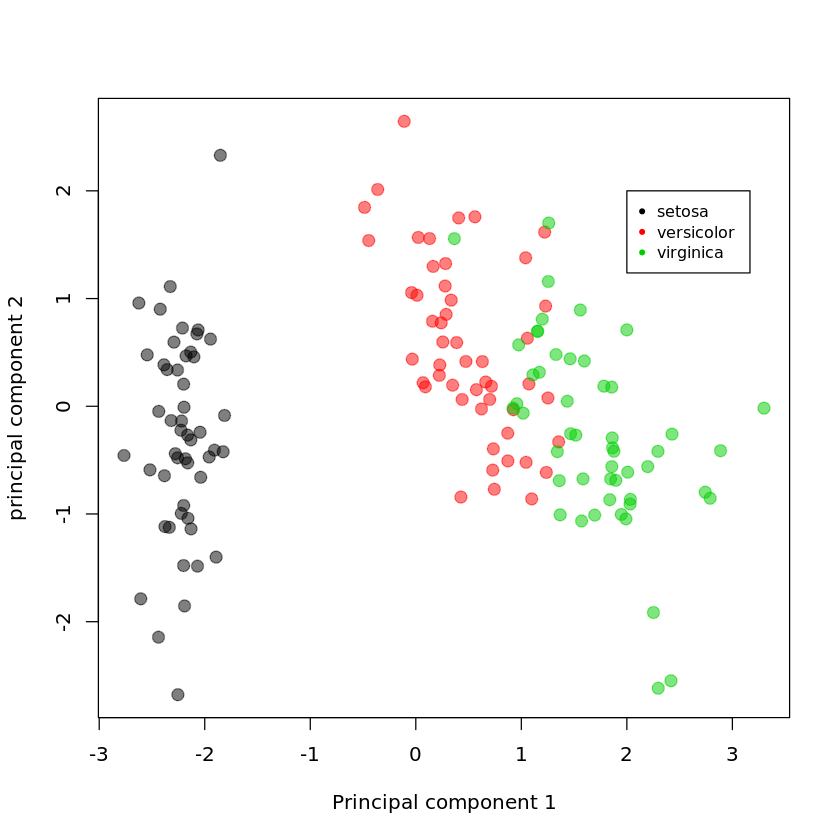

In [9]:
dim(rotated_values)
rotated_values = as.data.frame(rotated_values)
colors = iris[,5];
levels(colors)= c(1,2,3)
plot(rotated_values$PC1, rotated_values$PC2, xlab="Principal component 1",
    ylab="principal component 2", pch = 20, cex=2,
     col=adjustcolor(colors,alpha.f=0.5))
 legend(2,2, legend=levels(iris[,5]),pch=20,cex=0.8,col=levels(colors))

---

This is the end of the "Principal Component Analysis with R" notebook. Hopefully, now you understand what Principal Component Analysis is, what it's used for and how to use it in an R environment. Thank you for reading this notebook, and good luck on your studies.

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121">Walter Gomes de Amorim Junior</a>

<hr>
Copyright &copy; 2016 [Cognitive Class](https://cognitiveClass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).